In [1]:
import random, operator, time, itertools, math
import numpy as np
import seaborn as sns
from deap import algorithms, base, creator, tools
import statistics

import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx

In [2]:
import seaborn
seaborn.set(style='whitegrid')
seaborn.set_context('notebook')

funções

In [3]:
def plot_tour(tour):
    tourX,tourY=[p.real for p in tour],[p.imag for p in tour]
    tourX=tourX+[tourX[0]]
    tourY=tourY+[tourY[0]]
    plt.plot(tourX,tourY,'bo-')
    plt.plot([tourX[0]],[tourY[0]],'gD',markersize=12)
    plt.show()

In [4]:
def distance (A,B):
    return abs(A-B)

In [5]:
def generate_cities(n):
    return set(City(random.randrange(1,1000),random.randrange(1,1000)) for i in range(n))

In [6]:
def get_tour(individual):
    result=[]
    for i in individual:
        result.append(list(cities)[i])
    return result

In [7]:
def total_distance(tour):
    return sum(distance(tour[i],tour[i-1]) for i in range(len(tour)))

In [8]:
def nearest(cities, C):
    return min(cities, key=lambda x: distance(x,C))

In [9]:
def tsp(cities):
    return min(alltours(cities),key=total_distance)

In [10]:
def tsp_greedy(cities):
    start=list(cities)[0]
    tour=[start]
    unvisited=cities - {start}
    while unvisited:
        C=nearest(unvisited, tour[-1])
        tour.append(C)
        unvisited.remove(C)
    return tour

In [11]:
def index_to_cities(individual):
    return [list(cities)[e] for e in individual]

In [12]:
def evaluation(individual):
    return (total_distance(index_to_cities(individual)),)

In [13]:
def p_decrease(value_max, value_min):
    return (100*(value_max-value_min)/value_max)

In [14]:
def times_faster(t1, t2):
    return t1/t2

exploração inicial

In [15]:
alltours = itertools.permutations

City = complex

In [16]:
n_cities=10
cities=generate_cities(n_cities)

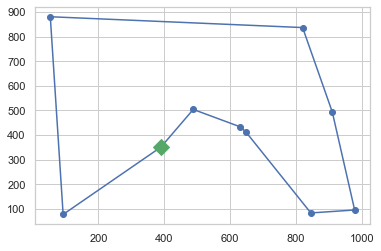

In [17]:
tour=tsp(cities)
plot_tour(tour)

In [18]:
creator.create("FitnessMin",base.Fitness, weights=(-1.0,))
creator.create("Individual",list, fitness=creator.FitnessMin)

In [19]:
toolbox=base.Toolbox()
toolbox.register("indices", np.random.permutation, n_cities)
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.indices)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

In [20]:
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.05)
toolbox.register("mate", tools.cxOrdered)

In [21]:
toolbox.register("evaluate", evaluation)
toolbox.register("select", tools.selTournament, tournsize=3)

tsp_alltours x tsp_greedy

teste simples

comparação temporal

In [22]:
print("algoritmo generico")
%timeit tsp(cities)

algoritmo generico
7.6 s ± 223 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [23]:
print("algoritmo ganancioso")
%timeit tsp_greedy(cities)

algoritmo ganancioso
14.2 µs ± 403 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


comparação de distancia total

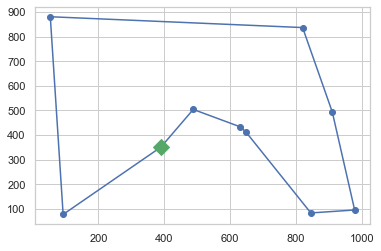

In [24]:
tour=tsp(cities)
plot_tour(tour)

In [25]:
tsp_dist=total_distance(tour)
tsp_dist

3621.037896345374

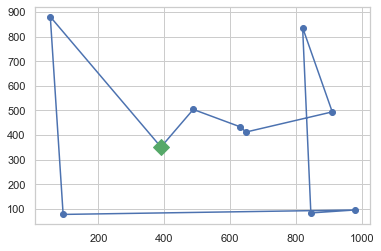

In [26]:
tour=tsp_greedy(cities)
plot_tour(tour)

In [27]:
tsp_greedy_dist=total_distance(tour)
tsp_greedy_dist

4203.127217981719

In [28]:
print("o algoritmo generico gera resultados",100*p_decrease(tsp_greedy_dist,tsp_dist),"porcento melhor")

o algoritmo generico gera resultados 1384.8957965061443 porcento melhor


In [78]:
tsp_greedy_dist=[]
tsp_dist=[]
min_dist=[]

tsp_greedy_time=[]
tsp_time=[]
min_time=[]

n=5
for i in range(30):
    cities_test=generate_cities(n)
    start_time=time.time()
    test=tsp(cities_test)
    stop_time=time.time()
    tsp_dist.append(total_distance(test))
    tsp_time.append(stop_time-start_time)
    
    start_time=time.time()
    test_greedy=tsp_greedy(cities_test)
    stop_time=time.time()
    tsp_greedy_dist.append(total_distance(test_greedy))
    tsp_greedy_time.append(stop_time-start_time)
    
    min_dist.append(p_decrease(tsp_greedy_dist[i],tsp_dist[i]))
    min_time.append((tsp_time[i]/tsp_greedy_time[i]))

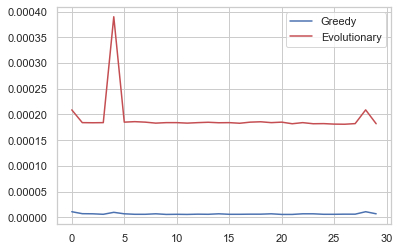

In [79]:
plt.plot(tsp_greedy_time,"b",alpha=1,label="Greedy")
plt.plot(tsp_time,"r",alpha=1,label="Evolutionary")
plt.legend(["Greedy", "Evolutionary"])

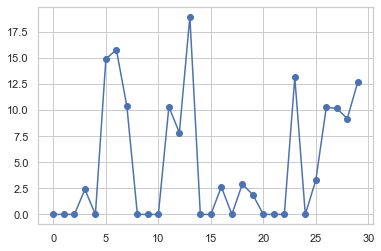

In [80]:
plt.plot(min_dist,"bo-",alpha=1)

In [81]:
np.max(min_dist)

18.95241120789979

In [82]:
np.min(min_dist)

0.0

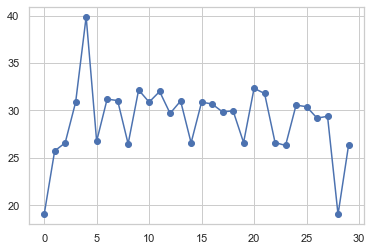

In [83]:
plt.plot(min_time,"bo-",alpha=1)

In [84]:
np.max(min_time)

39.8780487804878

In [85]:
np.min(min_time)

19.043478260869566

algoritmo evolucionario

comparação inicial do greedy

In [105]:
tsp_greedy_dist=[]
tsp_evo_dist=[]
min_dist=[]

tsp_greedy_time=[]
tsp_evo_time=[]
min_time=[]

n=5
n_pop=50
pop=toolbox.population(n=n_pop)
for i in range(30):
    cities_test=generate_cities(n)
    start_time=time.time()
    result, log=algorithms.eaSimple(pop, toolbox, cxpb=.5, mutpb=.3, ngen=60, verbose=False)
    stop_time=time.time()
    best=tools.selBest(result,k=1)[0]
    tsp_evo_dist.append(total_distance(index_to_cities(best)))
    tsp_evo_time.append(stop_time-start_time)
    
    start_time=time.time()
    test_greedy=tsp_greedy(cities_test)
    stop_time=time.time()
    tsp_greedy_dist.append(total_distance(test_greedy))
    tsp_greedy_time.append(stop_time-start_time)
    
    min_dist.append(p_decrease(tsp_evo_dist[i],tsp_greedy_dist[i]))
    min_time.append((tsp_evo_time[i]/tsp_greedy_time[i]))

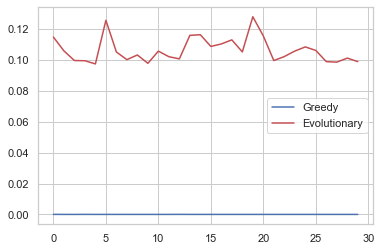

In [106]:
plt.plot(tsp_greedy_time,"b",alpha=1,label="Greedy")
plt.plot(tsp_evo_time,"r",alpha=1,label="Evolutionary")
plt.legend(["Greedy", "Evolutionary"])

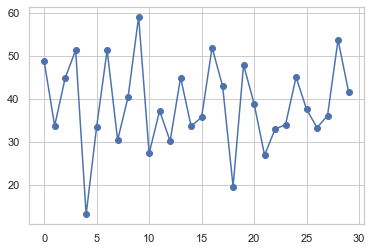

In [87]:
plt.plot(min_dist,"bo-",alpha=1)

In [88]:
np.max(min_dist)

59.071913404385825

In [89]:
np.min(min_dist)

13.062003855744285

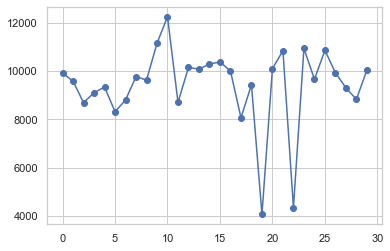

In [41]:
plt.plot(min_time,"bo-",alpha=1)

In [42]:
np.max(min_time)

12245.512195121952

In [43]:
np.min(min_time)

4060.4918032786886

comparação evolucionario com genérico

In [97]:
tsp_dist=[]
tsp_evo_dist=[]
min_dist=[]

tsp_time=[]
tsp_evo_time=[]
min_time=[]

n=5
n_pop=50
pop=toolbox.population(n=n_pop)
for i in range(30):
    cities_test=generate_cities(n)
    start_time=time.time()
    result, log=algorithms.eaSimple(pop, toolbox, cxpb=.5, mutpb=.3, ngen=60, verbose=False)
    stop_time=time.time()
    best=tools.selBest(result,k=1)[0]
    tsp_evo_dist.append(total_distance(index_to_cities(best)))
    tsp_evo_time.append(stop_time-start_time)
    
    start_time=time.time()
    test=tsp(cities_test)
    stop_time=time.time()
    tsp_dist.append(total_distance(test))
    tsp_time.append(stop_time-start_time)
    
    min_dist.append(p_decrease(tsp_evo_dist[i],tsp_dist[i]))
    min_time.append((tsp_evo_time[i]/tsp_time[i]))

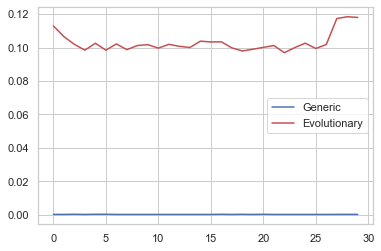

In [98]:
plt.plot(tsp_time,"b",alpha=1,label="Generic")
plt.plot(tsp_evo_time,"r",alpha=1,label="Evolutionary")
plt.legend(["Generic", "Evolutionary"])

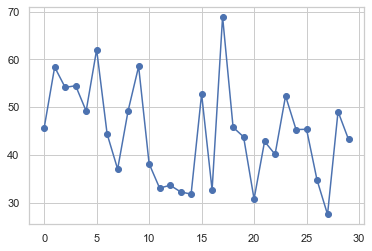

In [99]:
plt.plot(min_dist,"bo-",alpha=1)

In [100]:
np.max(min_dist)

68.92295694571635

In [101]:
np.min(min_dist)

27.52783424007134

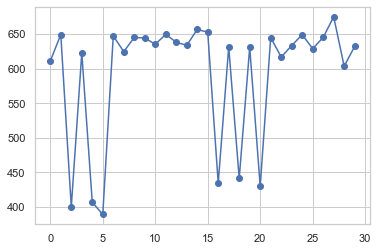

In [102]:
plt.plot(min_time,"bo-",alpha=1)

In [103]:
np.max(min_time)

675.1042524005487

In [104]:
np.min(min_time)

389.0556079170594

mais cidades

In [107]:
tsp_dist=[]
tsp_evo_dist=[]
min_dist=[]

tsp_time=[]
tsp_evo_time=[]
min_time=[]

n=10
n_pop=50
pop=toolbox.population(n=n_pop)
for i in range(30):
    cities_test=generate_cities(n)
    start_time=time.time()
    result, log=algorithms.eaSimple(pop, toolbox, cxpb=.5, mutpb=.3, ngen=60, verbose=False)
    stop_time=time.time()
    best=tools.selBest(result,k=1)[0]
    tsp_evo_dist.append(total_distance(index_to_cities(best)))
    tsp_evo_time.append(stop_time-start_time)
    
    start_time=time.time()
    test=tsp(cities_test)
    stop_time=time.time()
    tsp_dist.append(total_distance(test))
    tsp_time.append(stop_time-start_time)
    
    min_dist.append(p_decrease(tsp_evo_dist[i],tsp_dist[i]))
    min_time.append((tsp_evo_time[i]/tsp_time[i]))

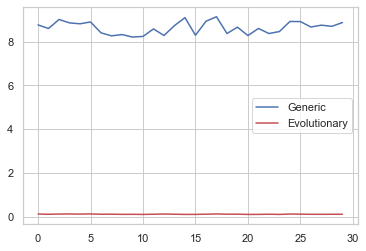

In [108]:
plt.plot(tsp_time,"b",alpha=1,label="Generic")
plt.plot(tsp_evo_time,"r",alpha=1,label="Evolutionary")
plt.legend(["Generic", "Evolutionary"])

In [109]:
tsp_greedy_dist=[]
tsp_evo_dist=[]
min_dist=[]

tsp_greedy_time=[]
tsp_evo_time=[]
min_time=[]

n=5
n_pop=50
pop=toolbox.population(n=n_pop)
for i in range(30):
    cities_test=generate_cities(n)
    start_time=time.time()
    result, log=algorithms.eaSimple(pop, toolbox, cxpb=.5, mutpb=.3, ngen=60, verbose=False)
    stop_time=time.time()
    best=tools.selBest(result,k=1)[0]
    tsp_evo_dist.append(total_distance(index_to_cities(best)))
    tsp_evo_time.append(stop_time-start_time)
    
    start_time=time.time()
    test_greedy=tsp_greedy(cities_test)
    stop_time=time.time()
    tsp_greedy_dist.append(total_distance(test_greedy))
    tsp_greedy_time.append(stop_time-start_time)
    
    min_dist.append(p_decrease(tsp_evo_dist[i],tsp_greedy_dist[i]))
    min_time.append((tsp_evo_time[i]/tsp_greedy_time[i]))

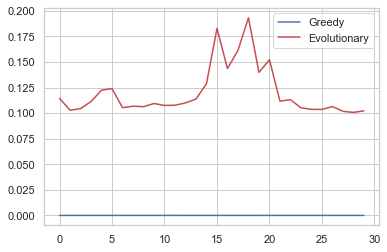

In [110]:
plt.plot(tsp_greedy_time,"b",alpha=1,label="Greedy")
plt.plot(tsp_evo_time,"r",alpha=1,label="Evolutionary")
plt.legend(["Greedy", "Evolutionary"])

testes de variações

população

In [44]:
n_populations=[n for n in range(50,501,50)]

In [45]:
for n_pop in n_populations:
    pop=toolbox.population(n=n_pop)
    print("population of",n_pop,":")
    %timeit result, log=algorithms.eaSimple(pop, toolbox, cxpb=.5, mutpb=.3, ngen=60, verbose=False)

population of 50 :
89.3 ms ± 490 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
population of 100 :
183 ms ± 7.23 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
population of 150 :
262 ms ± 3.02 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
population of 200 :
343 ms ± 2.72 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
population of 250 :
446 ms ± 23.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
population of 300 :
522 ms ± 5.99 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
population of 350 :
608 ms ± 11.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
population of 400 :
702 ms ± 30 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
population of 450 :
826 ms ± 55.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
population of 500 :
894 ms ± 33.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [46]:
bests=[]
bests_index=[]
means=[]
variance=[]

In [47]:
for n_pop in n_populations:
    pop=toolbox.population(n=n_pop)
    result, log=algorithms.eaSimple(pop, toolbox, cxpb=.5, mutpb=.3, ngen=60, verbose=False)
    best=tools.selBest(result,k=1)[0]
    all_ind=tools.selBest(result,k=n_pop)
    all_dist=[total_distance(index_to_cities(i)) for i in all_ind]
    bests_index.append(best)
    bests.append(total_distance(index_to_cities(best)))
    means.append(statistics.mean(all_dist))
    variance.append(statistics.variance(all_dist))

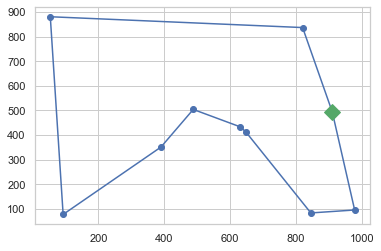

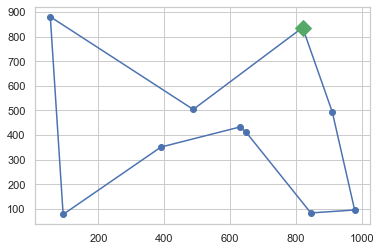

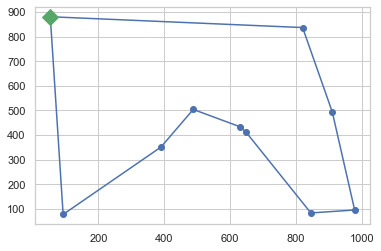

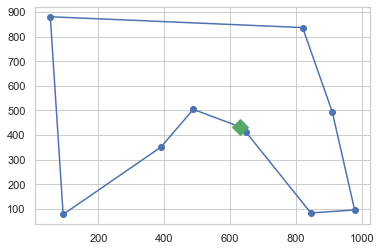

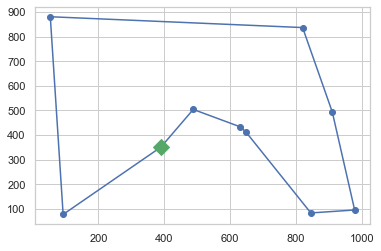

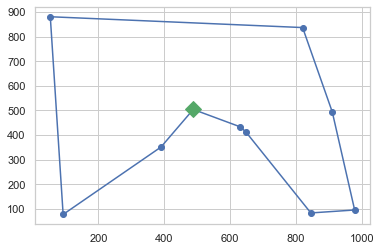

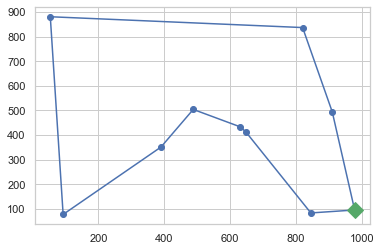

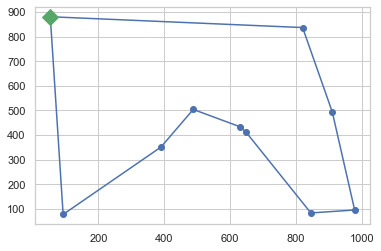

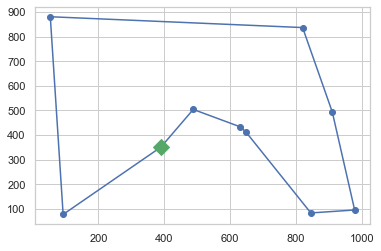

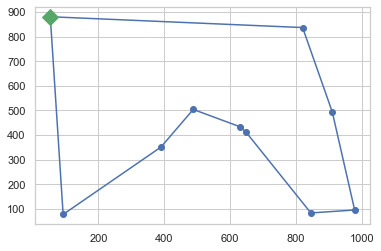

In [48]:
for index in bests_index:
    plot_tour(index_to_cities(index))

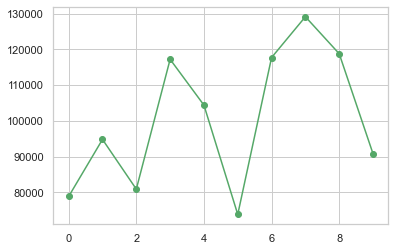

In [49]:
plt.plot(variance,"go-",alpha=1,label="variance")

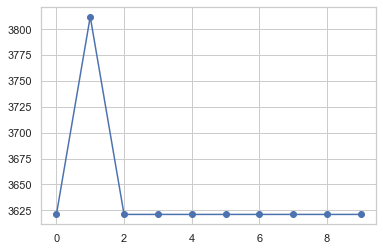

In [50]:
plt.plot(bests,"bo-",alpha=1,label="bests")

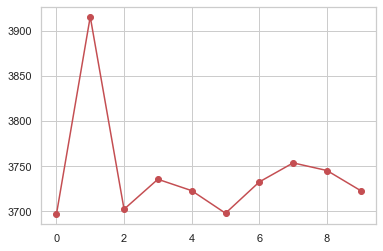

In [51]:
plt.plot(means,"ro-",alpha=1,label="means")

probabilidade de mutação

In [52]:
n_pop=50
pop=toolbox.population(n=n_pop)

In [53]:
n_mutpbs = np.arange(0, .51, .05)

In [54]:
bests=[]
bests_index=[]
means=[]
variance=[]

In [55]:
for n in n_mutpbs:
    print("probability of mutation",n,":")
    %timeit result, log=algorithms.eaSimple(pop, toolbox, cxpb=.5, mutpb=n, ngen=60, verbose=False)

probability of mutation 0.0 :
498 ms ± 4.58 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
probability of mutation 0.05 :
527 ms ± 31.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
probability of mutation 0.1 :
510 ms ± 7.13 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
probability of mutation 0.15000000000000002 :
538 ms ± 27.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
probability of mutation 0.2 :
516 ms ± 11.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
probability of mutation 0.25 :
534 ms ± 29.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
probability of mutation 0.30000000000000004 :
533 ms ± 9.52 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
probability of mutation 0.35000000000000003 :
531 ms ± 17.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
probability of mutation 0.4 :
551 ms ± 24.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
probability of mutation 0.45 :
545 ms ± 16 ms per loop (mean ± std. 

In [56]:
for n in n_mutpbs:
    result, log=algorithms.eaSimple(pop, toolbox, cxpb=.5, mutpb=n, ngen=60, verbose=False)
    best=tools.selBest(result,k=1)[0]
    all_ind=tools.selBest(result,k=n_pop)
    all_dist=[total_distance(index_to_cities(i)) for i in all_ind]
    bests_index.append(best)
    bests.append(total_distance(index_to_cities(best)))
    means.append(statistics.mean(all_dist))
    variance.append(statistics.variance(all_dist))

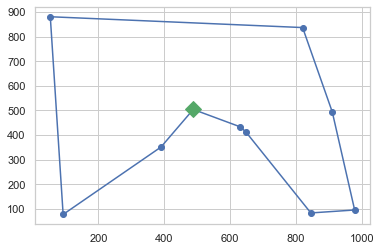

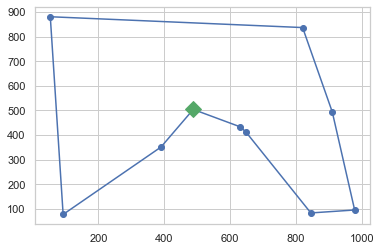

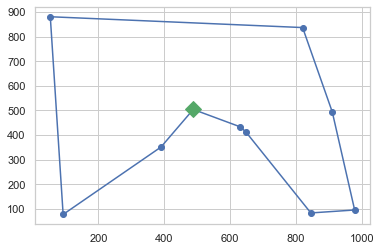

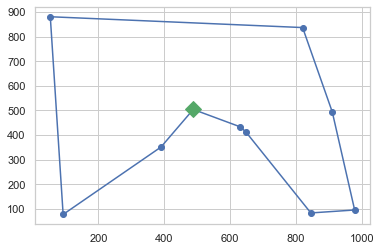

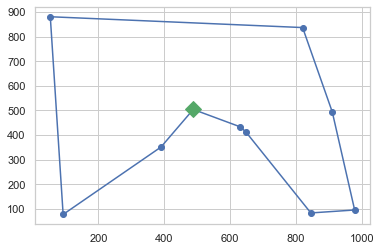

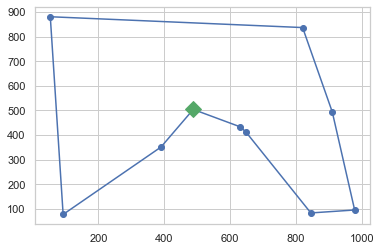

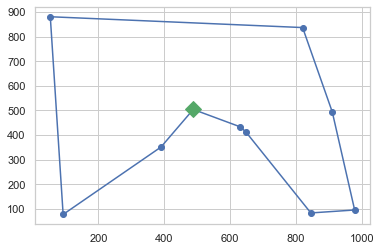

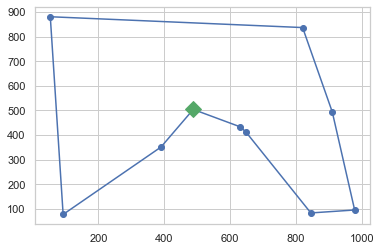

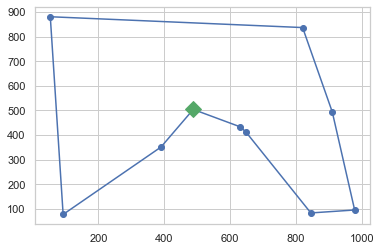

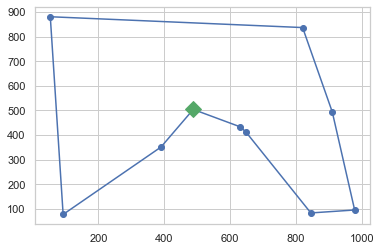

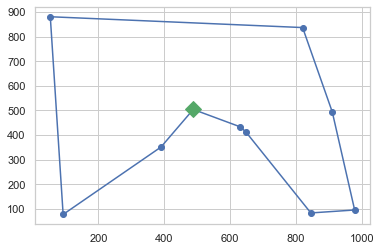

In [57]:
for index in bests_index:
    plot_tour(index_to_cities(index))

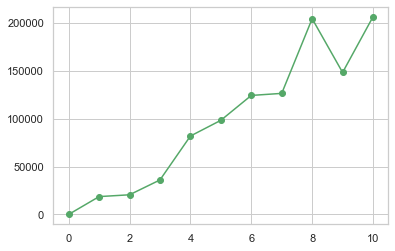

In [58]:
plt.plot(variance,"go-",alpha=1,label="variance")

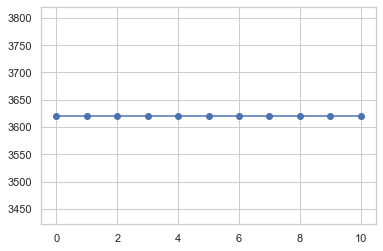

In [59]:
plt.plot(bests,"bo-",alpha=1,label="bests")

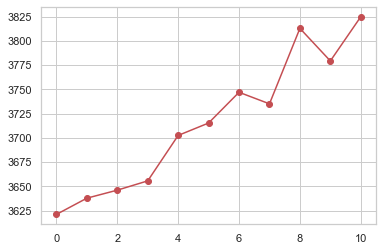

In [60]:
plt.plot(means,"ro-",alpha=1,label="means")

crossover

In [61]:
n_pop=50
pop=toolbox.population(n=n_pop)

In [62]:
n_cxpbs = [i for i in np.arange(0, 1.1, .1)]

In [63]:
bests=[]
bests_index=[]
means=[]
variance=[]

In [64]:
for n in n_cxpbs:
    print("crosssover",n,":")
    %timeit result, log=algorithms.eaSimple(pop, toolbox, cxpb=n, mutpb=.3, ngen=60, verbose=False)

crosssover 0.0 :
447 ms ± 4.33 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
crosssover 0.1 :
456 ms ± 2.78 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
crosssover 0.2 :
502 ms ± 37.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
crosssover 0.30000000000000004 :
542 ms ± 68.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
crosssover 0.4 :
551 ms ± 60.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
crosssover 0.5 :
525 ms ± 5.09 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
crosssover 0.6000000000000001 :
548 ms ± 31.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
crosssover 0.7000000000000001 :
558 ms ± 27.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
crosssover 0.8 :
635 ms ± 68.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
crosssover 0.9 :
580 ms ± 5.99 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
crosssover 1.0 :
596 ms ± 19.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [65]:
for n in n_cxpbs:
    result, log=algorithms.eaSimple(pop, toolbox, cxpb=n, mutpb=.3, ngen=60, verbose=False)
    best=tools.selBest(result,k=1)[0]
    all_ind=tools.selBest(result,k=n_pop)
    all_dist=[total_distance(index_to_cities(i)) for i in all_ind]
    bests_index.append(best)
    bests.append(total_distance(index_to_cities(best)))
    means.append(statistics.mean(all_dist))
    variance.append(statistics.variance(all_dist))

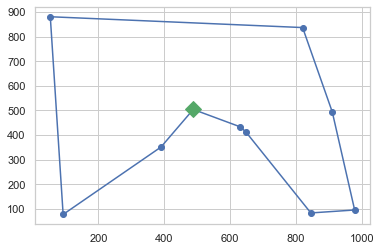

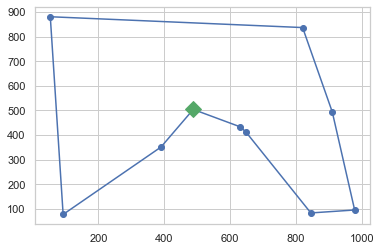

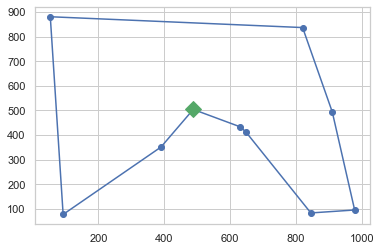

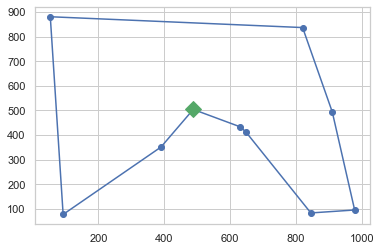

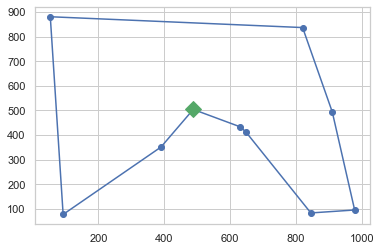

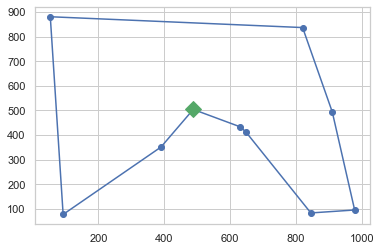

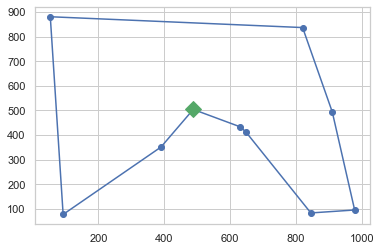

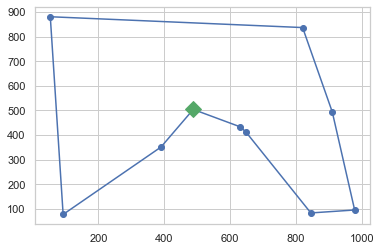

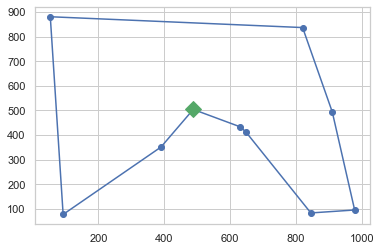

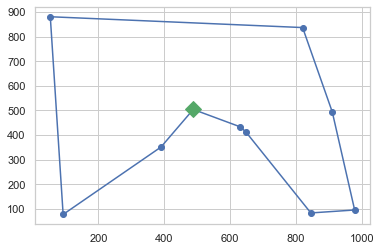

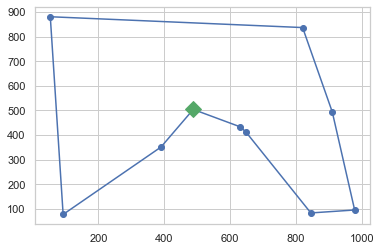

In [66]:
for index in bests_index:
    plot_tour(index_to_cities(index))

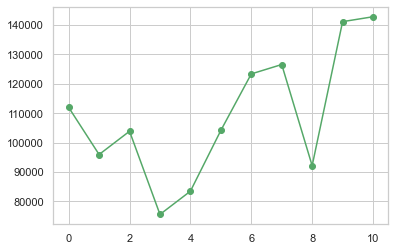

In [67]:
plt.plot(variance,"go-",alpha=1,label="variance")

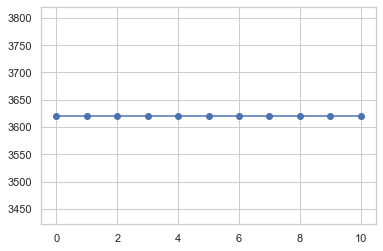

In [68]:
plt.plot(bests,"bo-",alpha=1,label="bests")

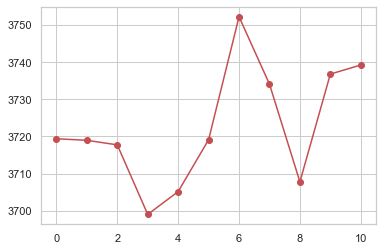

In [69]:
plt.plot(means,"ro-",alpha=1,label="means")